In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
import richardsplot
import pandas as pd
#from densityplot import *

In [3]:
def figsize(hscale, 
            vscale=(np.sqrt(5.0)-1.0)/2.0,
            fig_width_pt = 336.0):
   

    """
    Get the fig_width_pt by inserting \the\textwidth into LaTeX document.

    hscale is fraction of text width you want.

    vscale is fraction of hscale (defaults to golden ratio)  
    """
   
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt*hscale   # width in inches
    fig_height = fig_width*vscale                   # height in inches
    fig_size = [fig_width, fig_height]

    return fig_size

In [4]:
import palettable

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "axes.linewidth":1.5,               # width of box, 2 is too wide, 1 is too narrow
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 16,               # LaTeX default is 10pt font, font size of axis text label
    "axes.labelpad" : 6,                # Distance between label and axis
    "axes.formatter.limits":[-5, 5],    # use sci notation if log10 of axis range is smaller than first or larger than second 
    "axes.formatter.useoffset":False,
    "font.size": 16,
    "legend.fontsize": 12,              # Make the legend/label fonts a little smaller
    "xtick.labelsize": 16,              # Font size of numbers 
    "ytick.labelsize": 16,
    'xtick.major.width':1, 
    'xtick.minor.width':1, 
    'ytick.major.width':1, 
    'ytick.minor.width':1, 
    'xtick.major.size':10,             # size of tickmarks in points
    'xtick.minor.size':5, 
    'ytick.major.size':10, 
    'ytick.minor.size':5,
    'xtick.major.pad':8,               # distance between box and numbers
    'ytick.major.pad':8,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'figure.autolayout': True,
    "figure.figsize": figsize(1,1),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

mpl.rcParams.update(pgf_with_latex)


csdark = palettable.colorbrewer.qualitative.Dark2_5.mpl_colors
cspurple = palettable.colorbrewer.sequential.BuPu_4.mpl_colors
csorange = palettable.colorbrewer.sequential.YlOrBr_5.mpl_colors


In [5]:
#import pandas as pd
#Load the ICA weights from Paul's 6-component fitting (now for DR7)
infile = 'grdr7_180126.weights'
infoHewett = pd.read_csv(infile, sep = ' ', names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "detection", "peak_flux", "int_flux"]) #added detection for bokeh plot
infile1 = 'grdr7.radec'
infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])

dMask=np.array(infoHewett["detection"])

In [6]:

infile3 = 'grdr7_Shen2011_targ_uni.csv'
#infile4 = 'gr_info_a_short_coords_Allen2011.csv'

infoShen = pd.read_csv(infile3, skiprows=1, names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation", "DETECTION"])
#infoAllen = pd.read_csv(infile4, skiprows=1, names=["file","name","redshift","BALflag","RAx","DECx","SDSS","RAdeg","DEdeg","z","imag","SN","logF1700","logL1700","C4BI","C4d","C4Vmin","C4VMax","Separation"])

#print infoShen['redshift']

In [7]:
#Mask to pick out color-selected objects (ignores radio selected and NaN [non-DR7 objects])
cMask = np.array(infoShen['COLOR_FLAG'])

#This mask picks out our detections
dMask = np.array(infoShen['DETECTION'])

In [8]:
#Need to format weights for Scikit-Learn
weights = infoHewett[infoHewett.columns[2:]]
#print weights
X = np.array(weights)
#print(X)

wt_dMask = np.array(infoHewett["detection"])

wt_dX = X[wt_dMask==1] #find detection entries
wt_dX = wt_dX[:,:6] #reformat weights (eliminate detection column)
#print(wt_dX)

wt_ndX = X[wt_dMask==-1]
wt_ndX = wt_ndX[:,:6]
#print(wt_ndX)

 
    
# Array of each of the 6 weights
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]

W0 = X[:,0]+X[:,1]+X[:,2]+X[:,3]


(1.4, 2.5)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


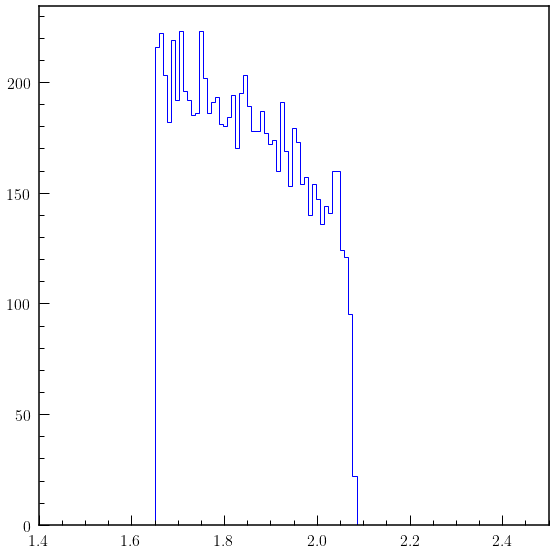

In [9]:
plt.figure(figsize=(8,8))
plt.hist(infoHewett['redshift'], color='b', bins=50, histtype='step')
plt.xlim(1.4,2.5)

In [10]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with z<1.75
zmask = ((zem<=1.75))
print (len(infoHewett[zmask]), len(infoHewett))
print (len(X[zmask]))
print (zem)

2329 8653
2329
[1.779394 1.882529 1.668503 ... 1.717688 1.997207 1.65575 ]


Text(0, 0.5, 'W3')

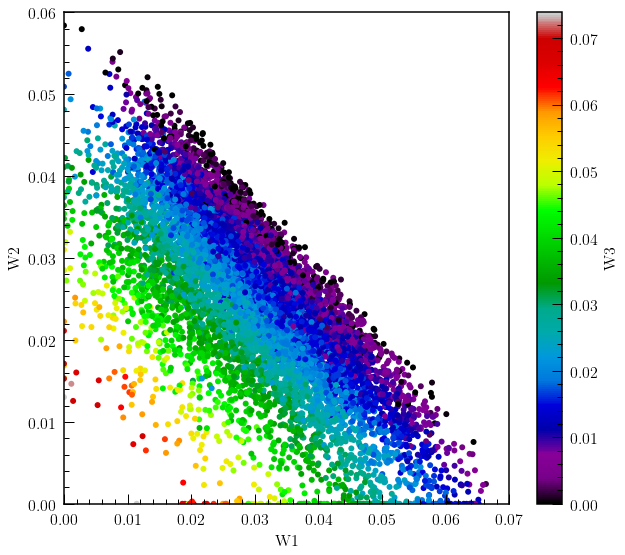

In [11]:
#Distribution of quasars in ICA weight space
plt.figure(figsize=(9,8))

plt.scatter(W1, W2, c=W3, cmap="nipy_spectral", edgecolor="None")
plt.xlabel('W1')
plt.ylabel('W2')
plt.xlim(0,0.07)
plt.ylim(0,0.06)
cbar = plt.colorbar()
cbar.ax.set_ylabel('W3')

In [12]:
#GTR: Did this a different way below.
#np.savetxt("grdr7.tSNE2.csv", projTSNE2, delimiter=",")

In [13]:
# t-SNE
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2)
projTSNE2 = tsne2.fit_transform(X[:,:6])

#dproj = tsne2.fit_transform(wt_dX)
#ndproj = tsne2.fit_transform(wt_ndX)

In [14]:
dproj = projTSNE2[wt_dMask==1] #organize coordinates to match d/nd in bokeh plot
ndproj = projTSNE2[wt_dMask==-1]
all_data_proj = projTSNE2[abs(wt_dMask)==1]

In [15]:
print(projTSNE2)

[[  3.2545323  20.469858 ]
 [-23.8232     20.178457 ]
 [-12.399821   74.68355  ]
 ...
 [-14.350665   54.728855 ]
 [ 10.940579   40.39995  ]
 [-68.385704  -14.905714 ]]


In [16]:
#Output tSNE projections to file
#infile1 = 'grdr7.radec'
#infoCoords = pd.read_csv(infile1, sep = ' ', names=["name", "RA", "Dec"])

df = pd.DataFrame({'Name':infoCoords['name'],'RA':infoCoords['RA'],'Dec':infoCoords['Dec'], 'Proj1':projTSNE2[:,0], 'Proj2':-1.0*projTSNE2[:,1]})
df.to_csv('grdr7.radec.projTSNE.csv')


In [17]:
#Read in radio data
R = np.array(infoShen['R6CM2500A']).astype(float)
FIRST = np.array(infoShen['FINTREST6CM']).astype(float)

In [18]:
#Radio-loud mask
RLmask = (R>10)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [19]:
projTSNE2rad = projTSNE2[RLmask]
print (len(projTSNE2), len(projTSNE2rad))

8653 519


In [30]:
#We are going to want to restrict the redshift range, do it like this.
zem = np.array(infoHewett['redshift'])

# Number with 1.55<z.1.75
#zmask = ((zem>1.65)&(zem<=1.658))
zmask = ((zem>1.645)&(zem<=1.6519))
print (len(infoHewett[zmask]), len(infoHewett))
print (len(X[zmask]))

#print (infoHewett[zmask])

50 8653
50


Two of these 50 are FIRST sources, 4 are BALs.

2353-0859 and 1019+4948

In [21]:
def make_sameName(i): #remove necessary characters to match image formatting (only to arcsec, remove SDSS) -- elim J as well : 8/23
    
    i = list(i)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(0)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(4)
    i.pop(9)
    i.pop(9)
    i.pop(9)
    i.pop(9)

    i = ''.join(i)

    return i


Create Interactive Bokeh Plot of Data Above:

J1019+4948 is labelled as a target in this but was not observed (not in OPT)

In [22]:
#Create infoTrevor -- this makes it easier to edit data and apply that to Bokeh plot properties

trevorsTargets = infoHewett[abs(wt_dMask)==1] #excludes 2 FIRST sources
#print(trevorsTargets)

thesenames=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "detection", "peak_flux", "int_flux"]
trevor = pd.DataFrame(trevorsTargets, columns=thesenames)

#trevor.to_csv("Trevors_finalFigs.csv")

In [23]:
infoTrevor = pd.read_csv('Trevors_finalFigs.csv', skiprows=1, names=["index", "name", "RMS", "redshift", "W1", "W2", "W3", "W4", "W5", "W6", "UNI_FLAG", "MIZ2", "detection", "UNI_DET", "peak_flux", "int_flux", "D_Mpc", "D_cm", "L_rad", "L_2500", "alpha_ro"])

dMask = np.array(infoTrevor["detection"])
uniMask = np.array(infoTrevor["UNI_FLAG"])

pfs = np.array(infoTrevor['peak_flux'])
d_pfs = pfs[dMask==1].astype(float) #the peak flux for each detection -- to be applied to size of data points
uniform_pfs = pfs[uniMask==1] #for highlight glyphs to match size of diamond markers

ifs = np.array(infoTrevor['int_flux'])
d_ifs = ifs[dMask==1] #same for int flux

nd_pfs = pfs[dMask==-1]

#print(np.array(infoTrevor[dMask==1]))
print(infoTrevor)
#print(uniform_pfs)

    index                     name   RMS  redshift       W1       W2       W3  \
0      22  SDSSJ104852.52+003230.0  16.0  1.650584  0.04427  0.00762  0.02254   
1     113  SDSSJ113548.66-022617.8  11.7  1.650240  0.02296  0.02971  0.02039   
2     214  SDSSJ215800.38+002724.2   8.5  1.650432  0.04607  0.01364  0.01134   
3     233  SDSSJ001342.45-002412.6   NaN  1.650561  0.02732  0.02415  0.02630   
4     293  SDSSJ014023.83+141151.7   NaN  1.650361  0.01581  0.04727  0.00394   
5     653  SDSSJ105814.69+015230.6  17.0  1.651886  0.01892  0.03231  0.01612   
6     677  SDSSJ114408.55+020221.2   NaN  1.650603  0.06337  0.00244  0.01351   
7    1021  SDSSJ120845.22+653344.6   9.9  1.651211  0.02340  0.02925  0.02029   
8    1270  SDSSJ014658.21-091505.2  10.0  1.650855  0.02277  0.03147  0.02065   
9    1281  SDSSJ015720.27-093809.1  23.7  1.650784  0.03413  0.02012  0.01647   
10   1375  SDSSJ213109.57+104714.2   8.7  1.651736  0.02691  0.02803  0.01935   
11   1556  SDSSJ124118.12+62

In [24]:
import bokeh.palettes as pal
from bokeh.plotting import figure, ColumnDataSource, output_file, show, output_notebook
from bokeh.models import HoverTool

Create data sources and hover tools for d/nd

### MIZ2 Analysis

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


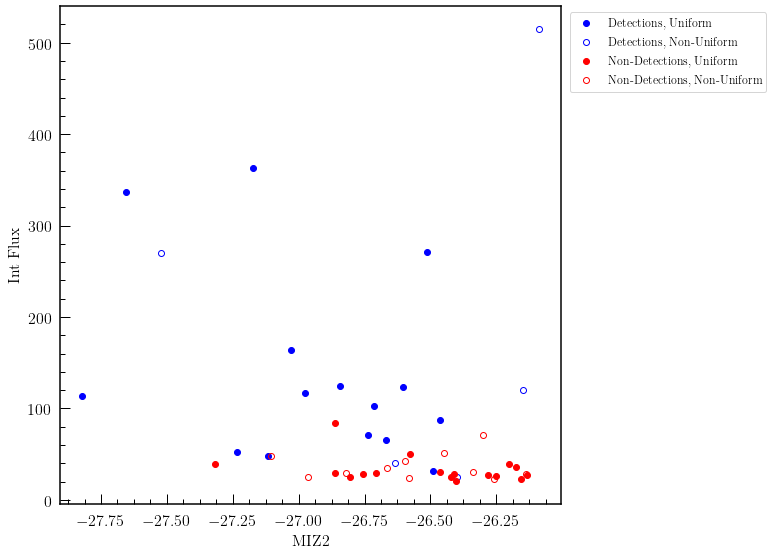

In [25]:
miz2 = np.array(infoTrevor["MIZ2"])
duniMask = np.array(infoTrevor["UNI_DET"])  #mask to sep det/nd from whether or not they are ALSO uniform

d_uni_MIZ2 = miz2[duniMask==2]
d_uni_ifs = ifs[duniMask==2]

d_nuni_MIZ2 = miz2[duniMask==1]
d_nuni_ifs = ifs[duniMask==1]

nd_uni_MIZ2 = miz2[duniMask==-1] 
nd_uni_ifs = ifs[duniMask==-1]

nd_nuni_MIZ2 = miz2[duniMask==-2]
nd_nuni_ifs = ifs[duniMask==-2]

plt.figure(figsize=(12,8))
plt.plot(d_uni_MIZ2, d_uni_ifs, 'bo', label='Detections, Uniform')
plt.plot(d_nuni_MIZ2, d_nuni_ifs, 'bo', markerfacecolor="None", label='Detections, Non-Uniform')
plt.plot(nd_uni_MIZ2, nd_uni_ifs, 'ro', label='Non-Detections, Uniform')
plt.plot(nd_nuni_MIZ2, nd_nuni_ifs, 'ro', markerfacecolor="None", label='Non-Detections, Non-Uniform') 
plt.legend(bbox_to_anchor=(1.42, 1))
plt.xlabel('MIZ2')
plt.ylabel('Int Flux')
plt.show()

(-28, -26)

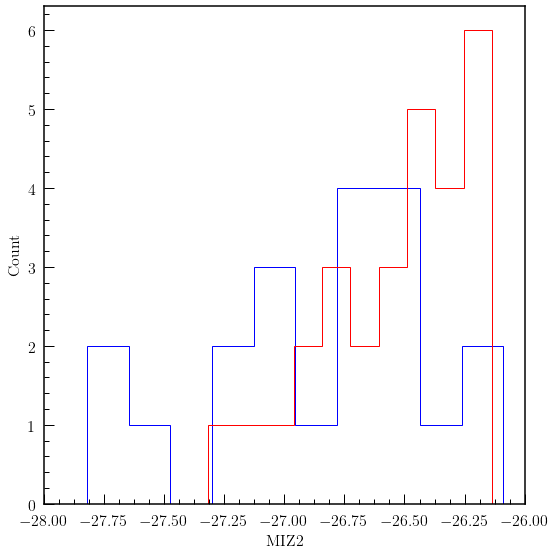

In [26]:
dMIZ2 = miz2[dMask==1]
ndMIZ2 = miz2[dMask==-1]

plt.figure(figsize=(8,8))
plt.hist(dMIZ2, color='b', bins=10, histtype='step', label='')
plt.hist(ndMIZ2, color='r', bins=10, histtype='step')
plt.xlabel('MIZ2')
plt.ylabel('Count')
plt.xlim(-28,-26)

### Radio Flux vs. Optical Luminosity

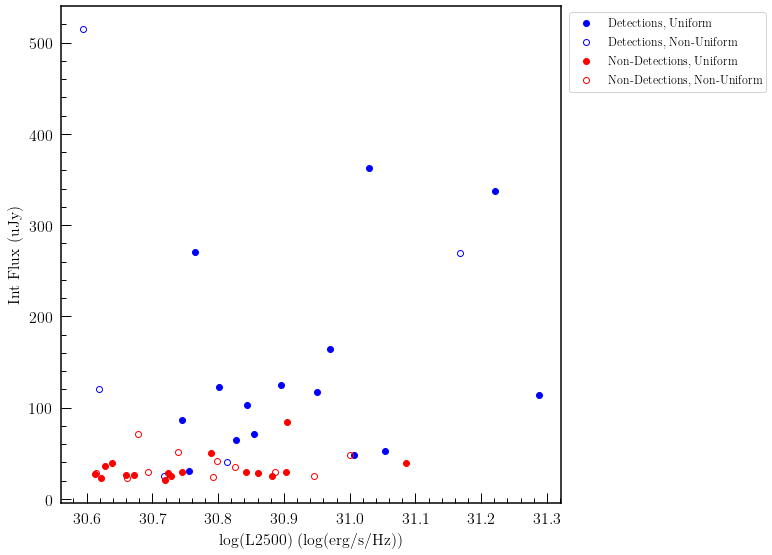

In [27]:
L2500 = np.array(infoTrevor["L_2500"])

d_uni_L2500 = L2500[duniMask==2]
d_nuni_L2500 = L2500[duniMask==1]

nd_uni_L2500 = L2500[duniMask==-1]
nd_nuni_L2500 = L2500[duniMask==-2]

plt.figure(figsize=(12,8))
plt.plot(d_uni_L2500, d_uni_ifs, 'bo', label='Detections, Uniform')
plt.plot(d_nuni_L2500, d_nuni_ifs, 'bo', markerfacecolor="None", label='Detections, Non-Uniform')
plt.plot(nd_uni_L2500, nd_uni_ifs, 'ro', label='Non-Detections, Uniform')
plt.plot(nd_nuni_L2500, nd_nuni_ifs, 'ro', markerfacecolor="None", label='Non-Detections, Non-Uniform') 
plt.legend(bbox_to_anchor=(1.42, 1))
plt.xlabel('log(L2500) (log(erg/s/Hz))')
plt.ylabel('Int Flux (uJy)')
plt.show()

### Alpha_ro with upper limits

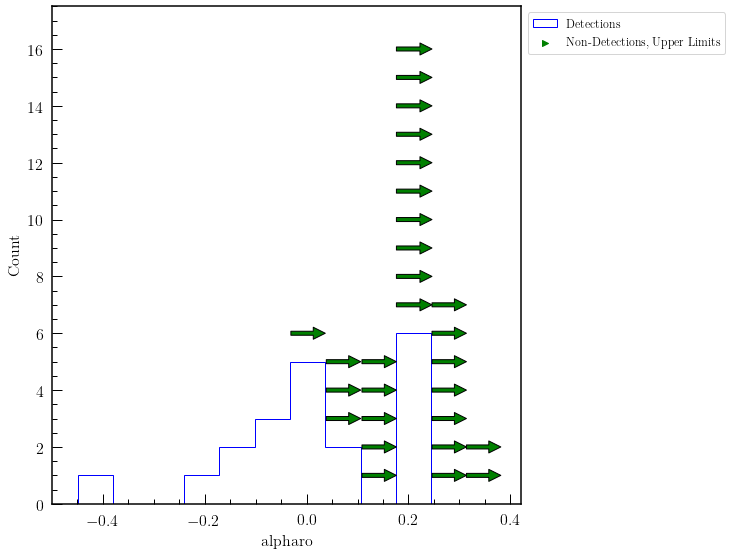

In [28]:
aro = np.array(infoTrevor['alpha_ro'])
aro_det = aro[dMask==1]
aro_ndet = aro[dMask==-1]
fill = []

#print(aro_ndet)

plt.figure(figsize=(10,8))
plt.hist(aro_det, color='b', bins=10, histtype='step', label='Detections')
plt.scatter(fill, fill, color='g', marker='>', label='Non-Detections, Upper Limits')
plt.xlabel('alpharo')
plt.ylabel('Count')
plt.xlim(-0.5,0.42)
plt.ylim(0, 17.5)




#Bin

plt.annotate('', xy=(0.0405, 6), xytext=(-0.0345, 6),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0157-0938


#Bin

plt.annotate('', xy=(0.11, 3), xytext=(0.035, 3),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1058+0152

plt.annotate('', xy=(0.11, 4), xytext=(0.035, 4),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0829+4016

plt.annotate('', xy=(0.11, 5), xytext=(0.035, 5),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1509+0756



#Bin

plt.annotate('', xy=(0.18, 1), xytext=(0.105, 1),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1600+3027

plt.annotate('', xy=(0.18, 2), xytext=(0.105, 2),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1546+1914

plt.annotate('', xy=(0.18, 3), xytext=(0.105, 3),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0905+1545

plt.annotate('', xy=(0.18, 4), xytext=(0.105, 4),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1135+0014

plt.annotate('', xy=(0.18, 5), xytext=(0.105, 5),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0816+4924


#Bin

plt.annotate('', xy=(0.25, 7), xytext=(0.1725, 7),
             arrowprops = dict(facecolor = 'g', shrink = 0.05))  #1048+0032

plt.annotate('', xy=(0.25, 8), xytext=(0.1725, 8),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1135-0226

plt.annotate('', xy=(0.25, 9), xytext=(0.1725, 9),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0146-0915

plt.annotate('', xy=(0.25, 10), xytext=(0.1725, 10),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #2131+1047

plt.annotate('', xy=(0.25, 11), xytext=(0.1725, 11),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1720+2847

plt.annotate('', xy=(0.25, 12), xytext=(0.1725, 12),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0824+2606

plt.annotate('', xy=(0.25, 13), xytext=(0.1725, 13),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1338+0846

plt.annotate('', xy=(0.25, 14), xytext=(0.1725, 14),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1406+2923

plt.annotate('', xy=(0.25, 15), xytext=(0.1725, 15),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1107+2708

plt.annotate('', xy=(0.25, 16), xytext=(0.1725, 16),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #2346-0029


#Bin

plt.annotate('',xy=(0.3175, 1), xytext=(0.2425, 1),
             arrowprops = dict(facecolor = 'g', shrink = 0.05), label='Non-Detection') #1208+6533

plt.annotate('',xy=(0.3175, 2), xytext=(0.2425, 2),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1537+4815

plt.annotate('',xy=(0.3175, 3), xytext=(0.2425, 3),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1305+4624

plt.annotate('',xy=(0.3175, 4), xytext=(0.2425, 4),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1322+3248

plt.annotate('',xy=(0.3175, 5), xytext=(0.2425, 5),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1130+1903

plt.annotate('',xy=(0.3175, 6), xytext=(0.2425, 6),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #1007+1628

plt.annotate('',xy=(0.3175, 7), xytext=(0.2425, 7),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0956+5347



#Bin 10

plt.annotate('', xy=(0.385, 1), xytext=(0.31, 1),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #2158+0027

plt.annotate('', xy=(0.385, 2), xytext=(0.31, 2),
             arrowprops = dict(facecolor = 'g', shrink = 0.05)) #0823+2139



plt.legend(bbox_to_anchor=(1.45, 1))